In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
####USER DEFINED INPUTS####
af2_metrics_t01_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240721_test_cc_rmsd/MSD_13632_07144_af2_metrics_t_01.csv'
socket_metrics_t01_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240718_msd_socket_outputs/MSD_13632_07144_all_socket_outputs_t_01.csv'

af2_metrics_t03_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240721_test_cc_rmsd/MSD_13632_07144_af2_metrics_t_03.csv'
socket_metrics_t03_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240718_msd_socket_outputs/MSD_13632_07144_all_socket_outputs_t_03.csv'

af2_metrics_t05_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240721_test_cc_rmsd/MSD_13632_07144_af2_metrics_t_05.csv'
socket_metrics_t05_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240718_msd_socket_outputs/MSD_13632_07144_all_socket_outputs_t_05.csv'

outdir = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240721_test_cc_rmsd'

sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks')
####

In [19]:
af2_metrics_t01_df = pd.read_csv(af2_metrics_t01_path)
socket_metrics_t01_df = pd.read_csv(socket_metrics_t01_path)

af2_metrics_t03_df = pd.read_csv(af2_metrics_t03_path)
socket_metrics_t03_df = pd.read_csv(socket_metrics_t03_path)

af2_metrics_t05_df = pd.read_csv(af2_metrics_t05_path)
socket_metrics_t05_df = pd.read_csv(socket_metrics_t05_path)

(1000, 4)
(67, 4)


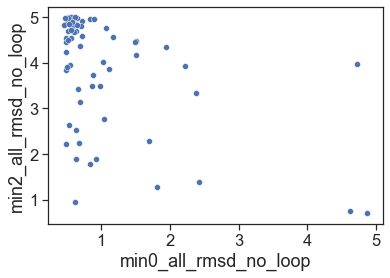

In [20]:
#t01
#split design column
af2_metrics_t01_df[['design_seq_id', 'design_af2_rank']] = af2_metrics_t01_df['design_id'].str.split('_unrelaxed', expand=True)
af2_metrics_t01_df['design_type'] = 'msd_mpnn_t01'

#get prediction with lowest rmsd to each state
lowest_rmsd_min0_df = af2_metrics_t01_df.sort_values('min0_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min0_df = lowest_rmsd_min0_df[['design_seq_id', 'min0_all_rmsd_no_loop', 'design_type']]

lowest_rmsd_min2_df = af2_metrics_t01_df.sort_values('min2_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min2_df = lowest_rmsd_min2_df[['design_seq_id', 'min2_all_rmsd_no_loop', 'design_type']]

lowest_rmsds_t01_df = pd.merge(lowest_rmsd_min0_df, lowest_rmsd_min2_df, on=['design_seq_id', 'design_type'])
print(lowest_rmsds_t01_df.shape)

#get only lowest rmsd < 5 angstrom
low_rmsd_t01_sorted_df = lowest_rmsds_t01_df.query('min0_all_rmsd_no_loop < 5.0 & min2_all_rmsd_no_loop < 5.0', engine='python').copy()
print(low_rmsd_t01_sorted_df.shape)

sns.scatterplot(data=low_rmsd_t01_sorted_df, x='min0_all_rmsd_no_loop', y='min2_all_rmsd_no_loop')
plt.show()

(1000, 4)
(77, 4)


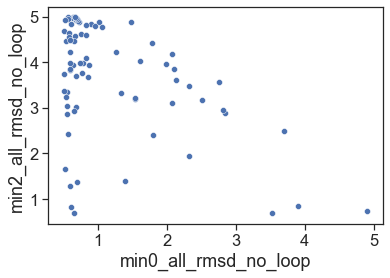

In [21]:
plt.clf()
#t03
#split design column
af2_metrics_t03_df[['design_seq_id', 'design_af2_rank']] = af2_metrics_t03_df['design_id'].str.split('_unrelaxed', expand=True)
af2_metrics_t03_df['design_type'] = 'msd_mpnn_t03'

#get prediction with lowest rmsd to each state
lowest_rmsd_min0_df = af2_metrics_t03_df.sort_values('min0_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min0_df = lowest_rmsd_min0_df[['design_seq_id', 'min0_all_rmsd_no_loop', 'design_type']]

lowest_rmsd_min2_df = af2_metrics_t03_df.sort_values('min2_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min2_df = lowest_rmsd_min2_df[['design_seq_id', 'min2_all_rmsd_no_loop', 'design_type']]

lowest_rmsds_t03_df = pd.merge(lowest_rmsd_min0_df, lowest_rmsd_min2_df, on=['design_seq_id', 'design_type'])
print(lowest_rmsds_t03_df.shape)

#get only lowest rmsd < 5 angstrom
low_rmsd_t03_sorted_df = lowest_rmsds_t03_df.query('min0_all_rmsd_no_loop < 5.0 & min2_all_rmsd_no_loop < 5.0', engine='python').copy()
print(low_rmsd_t03_sorted_df.shape)

sns.scatterplot(data=low_rmsd_t03_sorted_df, x='min0_all_rmsd_no_loop', y='min2_all_rmsd_no_loop')
plt.show()

(1000, 4)
(78, 4)


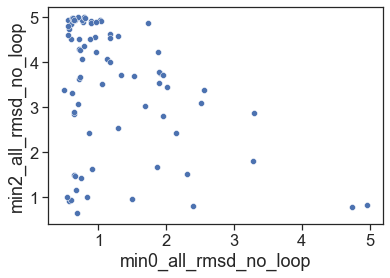

In [22]:
plt.clf()
#t05
#split design column
af2_metrics_t05_df[['design_seq_id', 'design_af2_rank']] = af2_metrics_t05_df['design_id'].str.split('_unrelaxed', expand=True)
af2_metrics_t05_df['design_type'] = 'msd_mpnn_t05'

#get prediction with lowest rmsd to each state
lowest_rmsd_min0_df = af2_metrics_t05_df.sort_values('min0_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min0_df = lowest_rmsd_min0_df[['design_seq_id', 'min0_all_rmsd_no_loop', 'design_type']]

lowest_rmsd_min2_df = af2_metrics_t05_df.sort_values('min2_all_rmsd_no_loop', ascending=True).drop_duplicates('design_seq_id').sort_index()
lowest_rmsd_min2_df = lowest_rmsd_min2_df[['design_seq_id', 'min2_all_rmsd_no_loop', 'design_type']]

lowest_rmsds_t05_df = pd.merge(lowest_rmsd_min0_df, lowest_rmsd_min2_df, on=['design_seq_id', 'design_type'])
print(lowest_rmsds_t05_df.shape)

#get only lowest rmsd < 5 angstrom
low_rmsd_t05_sorted_df = lowest_rmsds_t05_df.query('min0_all_rmsd_no_loop < 5.0 & min2_all_rmsd_no_loop < 5.0', engine='python').copy()
print(low_rmsd_t05_sorted_df.shape)

sns.scatterplot(data=low_rmsd_t05_sorted_df, x='min0_all_rmsd_no_loop', y='min2_all_rmsd_no_loop')
plt.show()

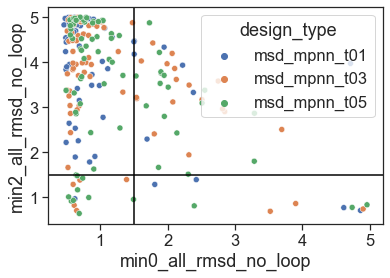

(16, 4)


In [33]:
plt.clf()
#plot all design sets together
all_low_rmsd_sorted_df = pd.concat([low_rmsd_t01_sorted_df, low_rmsd_t03_sorted_df, low_rmsd_t05_sorted_df])

sns.scatterplot(data=all_low_rmsd_sorted_df, x='min0_all_rmsd_no_loop', y='min2_all_rmsd_no_loop', hue='design_type')
plt.axhline(y=1.5, color='black', linestyle='-')
plt.axvline(x=1.5, color='black', linestyle='-')
plt.show()

all_low_rmsd_sorted_df = all_low_rmsd_sorted_df.query('min0_all_rmsd_no_loop < 1.5 & min2_all_rmsd_no_loop < 1.5', engine='python').copy()
all_low_rmsd_sorted_df.to_csv(f'{outdir}/all_low_rmsd_sorted.csv', index=False)
print(all_low_rmsd_sorted_df.shape)

In [52]:
#output df of lowest rmsds with all metrics and merge with socket metrics
design_seq_id_list = all_low_rmsd_sorted_df['design_seq_id'].tolist()
low_rmsd_af2_metrics_t01_df = af2_metrics_t01_df.query('design_seq_id in @design_seq_id_list', engine='python').copy()
low_rmsd_af2_metrics_t01_df = pd.merge(left=low_rmsd_af2_metrics_t01_df, right=socket_metrics_t01_df, on='design_id', how='left')

low_rmsd_af2_metrics_t03_df = af2_metrics_t03_df.query('design_seq_id in @design_seq_id_list', engine='python').copy()
low_rmsd_af2_metrics_t03_df = pd.merge(left=low_rmsd_af2_metrics_t03_df, right=socket_metrics_t03_df, on='design_id', how='left')

low_rmsd_af2_metrics_t05_df = af2_metrics_t05_df.query('design_seq_id in @design_seq_id_list', engine='python').copy()
low_rmsd_af2_metrics_t05_df = pd.merge(left=low_rmsd_af2_metrics_t05_df, right=socket_metrics_t05_df, on='design_id', how='left')

candidate_seqs_df = pd.concat([low_rmsd_af2_metrics_t01_df, low_rmsd_af2_metrics_t03_df, low_rmsd_af2_metrics_t05_df])

#filter by socket metrics
candidate_seqs_df = candidate_seqs_df.query('socket_call == 1.0', engine='python').copy()

#filter by af2 metrics
candidate_seqs_df = candidate_seqs_df.query('avg_plddt_no_loop >= 80.0 & avg_pae_no_loop <= 5.0', engine='python').copy()

print(candidate_seqs_df.shape)
candidate_seqs_df.to_csv(f'{outdir}/candidate_seqs.csv', index=False)

#TODO-relevant models to pull pdb

(36, 19)


In [ ]:
#load all mpnn datasets and plot all together like above
#output df of lowest rmsds for each set and merge with socket, look at all metrics
#pull out example pdbs for each set and look at them in pymol